<a href="https://colab.research.google.com/github/NabonitaSaha11/Artificial_Intelligence/blob/main/cse422_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Initial Dataset Description (Before Preprocessing)

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Career_Switch_Prediction_Dataset.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
def display_dataset(df):
  df_info = {
      "Shape": df.shape,
      "Columns": df.columns.tolist(),
      "Data Types": df.dtypes,
      "First Few Rows": df.head()
  }

  pd.set_option("display.width", 300)
  pd.set_option("display.max_columns", None)
  print("\n".join(f"{key}:\n{value}\n" for key, value in df_info.items()))

display_dataset(df)

Shape:
(5000, 14)

Columns:
['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'will_change_career']

Data Types:
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
will_change_career          int64
dtype: object

First Few Rows:
   enrollee_id      city  city_development_index gender      relevent_experience enrolled_university education_level major_discipline experience company_size    company_type last_new_job  training_hours  w

##Exploratory Data Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Check cardinality of object (categorical) columns
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

city: 113 unique values
gender: 3 unique values
relevent_experience: 2 unique values
enrolled_university: 3 unique values
education_level: 5 unique values
major_discipline: 6 unique values
experience: 22 unique values
company_size: 8 unique values
company_type: 6 unique values
last_new_job: 6 unique values


In [ ]:
# Check for missing values
missing = df.isnull().sum()
print(f"Missing: \n",missing[missing > 0])

Missing: 
 gender                 1113
enrolled_university     107
education_level         118
major_discipline        724
experience               11
company_size           1571
company_type           1621
last_new_job            104
dtype: int64


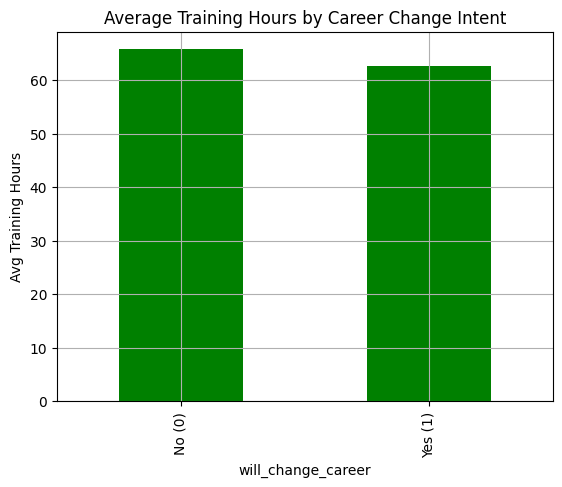

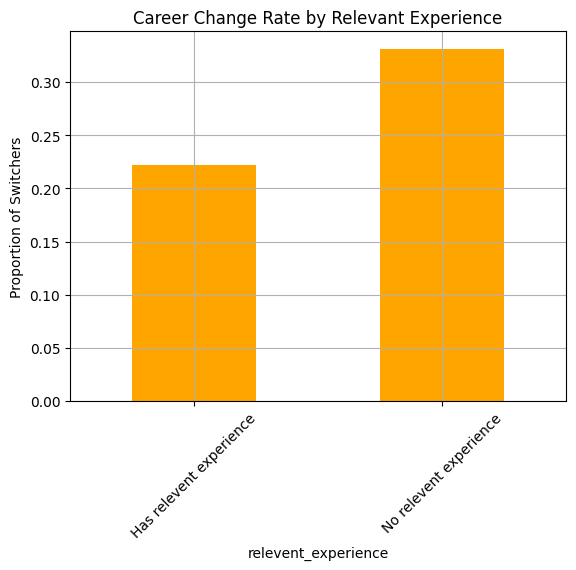

In [ ]:
#interesting plots
# Average training hours by class
df.groupby('will_change_career')['training_hours'].mean().plot(kind='bar', color='green')
plt.title("Average Training Hours by Career Change Intent")
plt.ylabel("Avg Training Hours")
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.grid()
plt.show()
print()
# Proportion of career changers by relevant experience
df.groupby('relevent_experience')['will_change_career'].mean().plot(kind='bar', color='orange')
plt.title("Career Change Rate by Relevant Experience")
plt.ylabel("Proportion of Switchers")
plt.grid()
plt.xticks(rotation=45)
plt.show()
print()


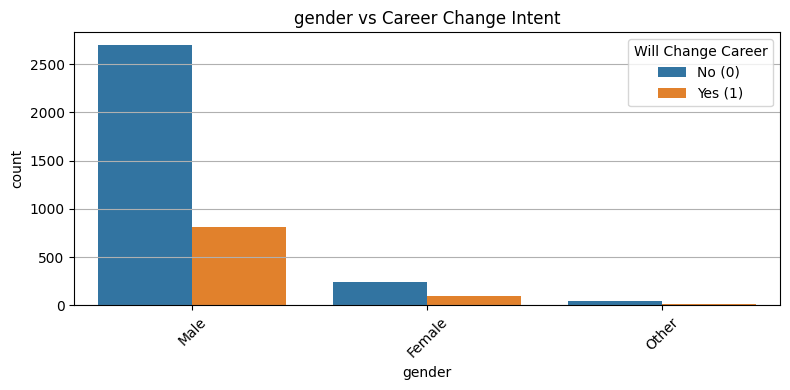

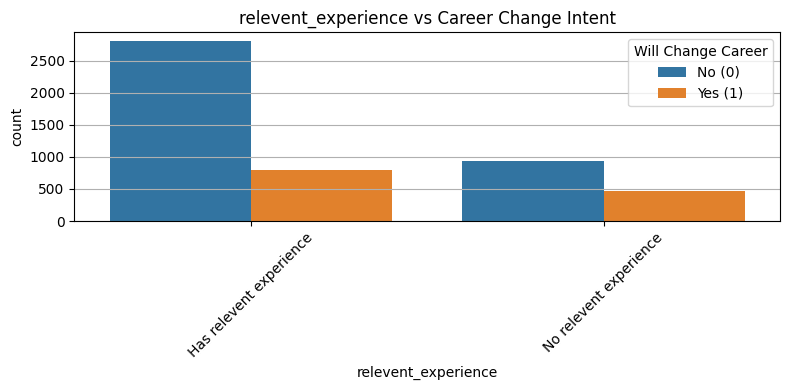

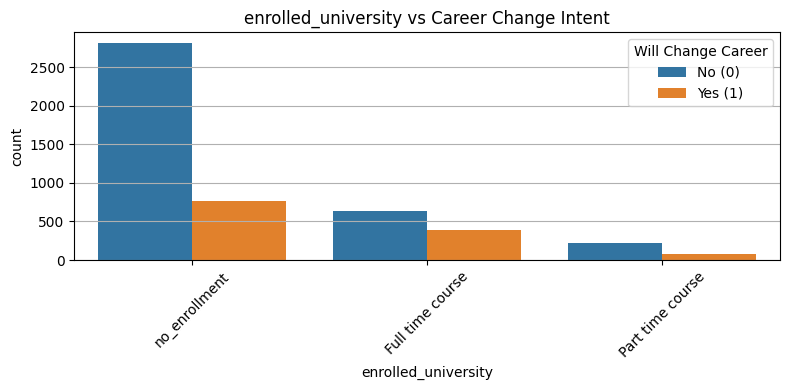

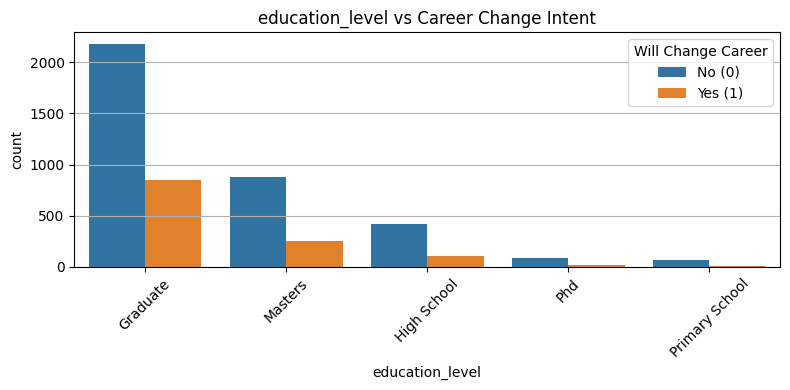

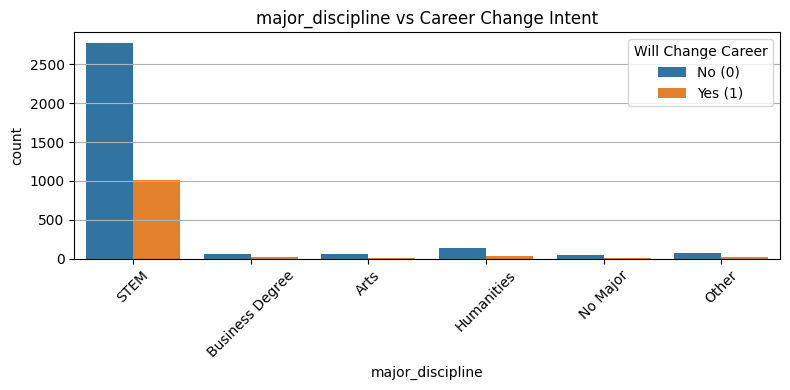

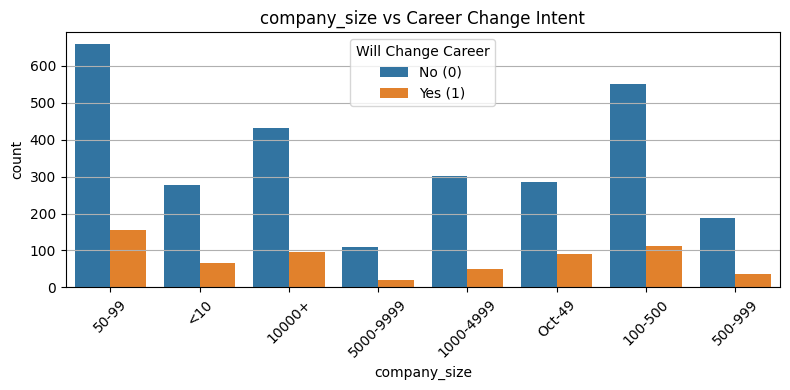

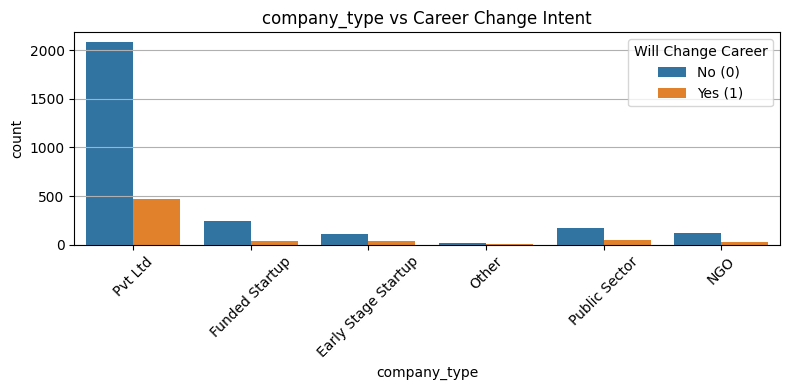

In [ ]:
# Dominant Category Check (Categorical Features)
import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['gender', 'relevent_experience', 'enrolled_university',
            'education_level', 'major_discipline', 'company_size', 'company_type']

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='will_change_career', data=df)
    plt.title(f'{col} vs Career Change Intent')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Will Change Career', labels=['No (0)', 'Yes (1)'])
    plt.grid(axis='y')
    plt.show()

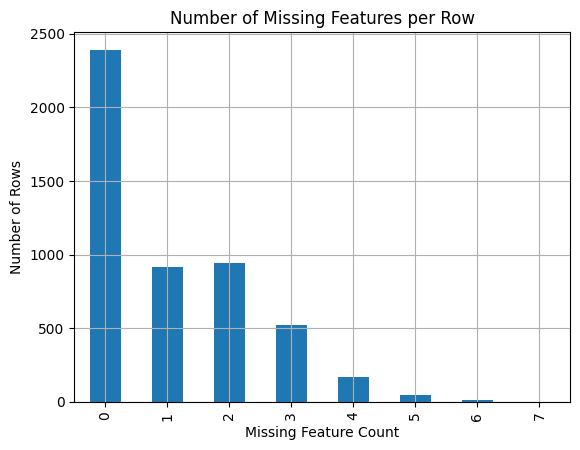

In [ ]:
#Number of missing features per row
df['missing_count'] = df.isnull().sum(axis=1)
df['missing_count'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Missing Features per Row")
plt.xlabel("Missing Feature Count")
plt.ylabel("Number of Rows")
plt.grid()
plt.show()
df = df.drop(columns='missing_count')

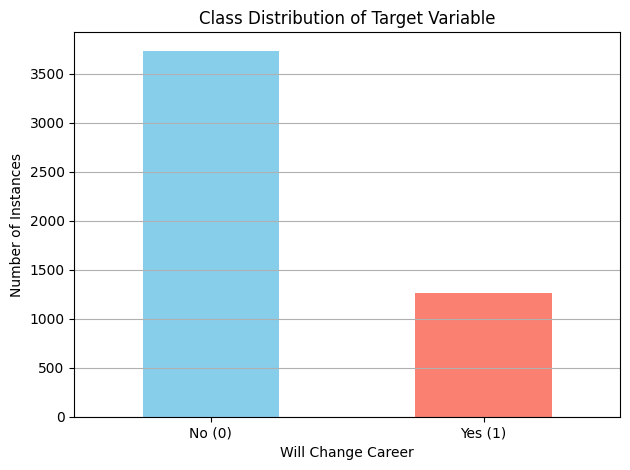

In [ ]:
# === Class Imbalance Bar Chart ===
import matplotlib.pyplot as plt

df['will_change_career'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution of Target Variable')
plt.xlabel('Will Change Career')
plt.ylabel('Number of Instances')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##Data Preprocessing (except scaling)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# === Missing Value Imputation / Value corrections ===

#normalizing spelling
df['company_type'] = df['company_type'].replace({
    'Pvt Ltd': 'Private Limited',
    'NGO': 'Non-Governmental Organization'
})

#Fixing a data entry error
df['company_size'] = df['company_size'].replace('Oct-49', '10-49')

#imputing missing categorical values with mode
cat_features = ['gender', 'enrolled_university', 'education_level',
                'major_discipline', 'company_size', 'company_type']

for col in cat_features:
    df[col] = df[col].fillna(df[col].mode()[0])

# processing + imputing numerical values with median
df['experience'] = df['experience'].replace({'>20': 21, '<1': 0.5})
df['experience'] = pd.to_numeric(df['experience'], errors='coerce')
df['experience'] = df['experience'].fillna(df['experience'].median())

df['last_new_job'] = df['last_new_job'].replace({'>4': 5})
df['last_new_job'] = pd.to_numeric(df['last_new_job'], errors='coerce')
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].median())





In [ ]:
# === Encoding for Categorical Features ===
from sklearn.preprocessing import LabelEncoder

# for binary categoricals:
df['relevent_experience'] = df['relevent_experience'].map({'Has relevent experience': 1, 'No relevent experience': 0})

#for ordinal categoricals
edu_order = {'Primary School': 0, 'High School': 1, 'Graduate': 2, 'Masters': 3, 'Phd': 4}
df['education_level'] = df['education_level'].map(edu_order)

size_order = {'<10': 0, '10-49': 1, '50-99': 2, '100-500': 3,'500-999': 4, '1000-4999': 5, '5000-9999': 6, '10000+': 7}
df['company_size'] = df['company_size'].map(size_order)

#label encoding for city
label_enc_cols = ['city']
le = LabelEncoder()
for col in label_enc_cols:
    df[col] = le.fit_transform(df[col])

#one-hot encoding for the rest
one_hot_cols = ['enrolled_university', 'major_discipline', 'company_type', 'gender']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)


In [ ]:
# === Dropping Non-Predictive Identifier Column ===
df.drop('enrollee_id', axis=1, inplace=True)

##Dataset Description (Correlation Heatmap and EDA after Preprocessing)

In [ ]:
# Display basic information about the dataset
display_dataset(df)

Shape:
(5000, 23)

Columns:
['city', 'city_development_index', 'relevent_experience', 'education_level', 'experience', 'company_size', 'last_new_job', 'training_hours', 'will_change_career', 'enrolled_university_Part time course', 'enrolled_university_no_enrollment', 'major_discipline_Business Degree', 'major_discipline_Humanities', 'major_discipline_No Major', 'major_discipline_Other', 'major_discipline_STEM', 'company_type_Funded Startup', 'company_type_Non-Governmental Organization', 'company_type_Other', 'company_type_Private Limited', 'company_type_Public Sector', 'gender_Male', 'gender_Other']

Data Types:
city                                            int64
city_development_index                        float64
relevent_experience                             int64
education_level                                 int64
experience                                    float64
company_size                                    int64
last_new_job                                  float64
tr

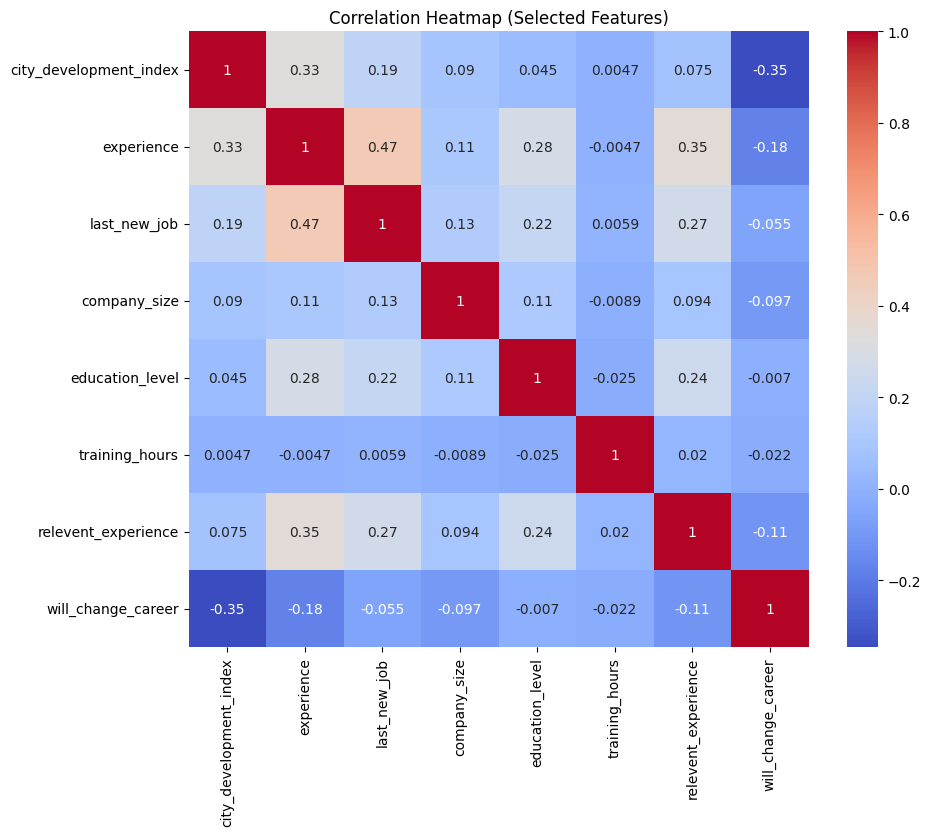

In [ ]:
# === Correlation Heatmap ===
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = [
    'city_development_index', 'experience', 'last_new_job',
    'company_size', 'education_level', 'training_hours',
    'relevent_experience', 'will_change_career'
]

# Plotting
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Selected Features)")
plt.show()

##Train-Test Split + Scaling

In [ ]:
# === Dataset Splitting ===
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('will_change_career', axis=1)
y = df['will_change_career']

# Split data (apply SMOTE to training set)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# === Apply SMOTE ===
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# === Feature Scaling ===
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

##Model Training + Testing + Evaluation (accuracy, confusion matrix, classification report)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [ ]:
# Defining models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam',
                         max_iter=1000, random_state=42)
}



=== KNN ===


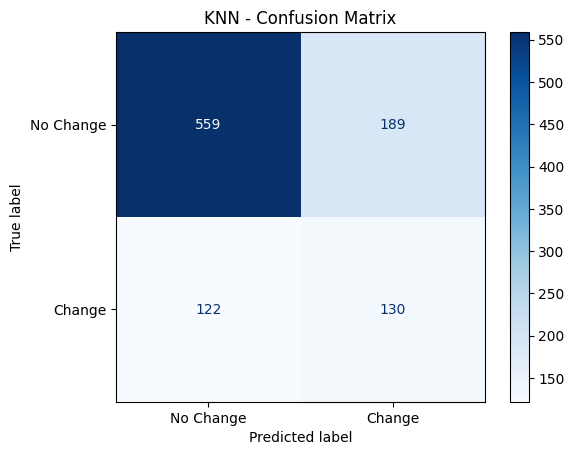

Accuracy: 0.6890
Classification Report:
              precision    recall  f1-score   support

   No Change       0.82      0.75      0.78       748
      Change       0.41      0.52      0.46       252

    accuracy                           0.69      1000
   macro avg       0.61      0.63      0.62      1000
weighted avg       0.72      0.69      0.70      1000


=== Logistic Regression ===


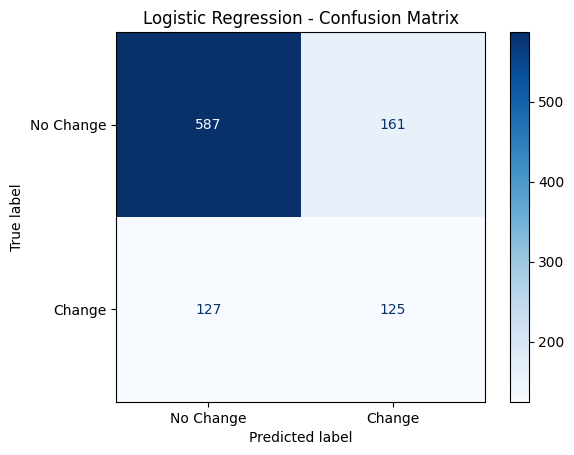

Accuracy: 0.7120
Classification Report:
              precision    recall  f1-score   support

   No Change       0.82      0.78      0.80       748
      Change       0.44      0.50      0.46       252

    accuracy                           0.71      1000
   macro avg       0.63      0.64      0.63      1000
weighted avg       0.73      0.71      0.72      1000


=== Neural Network ===


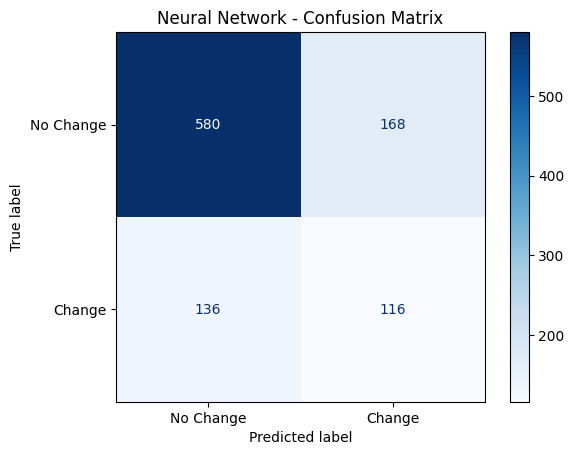

Accuracy: 0.6960
Classification Report:
              precision    recall  f1-score   support

   No Change       0.81      0.78      0.79       748
      Change       0.41      0.46      0.43       252

    accuracy                           0.70      1000
   macro avg       0.61      0.62      0.61      1000
weighted avg       0.71      0.70      0.70      1000



In [ ]:
for name, model in models.items():
    print(f"\n=== {name} ===")

    model.fit(X_train_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["No Change", "Change"]).plot(cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")


    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["No Change", "Change"]))


##Compute ROC & AUC and Plot

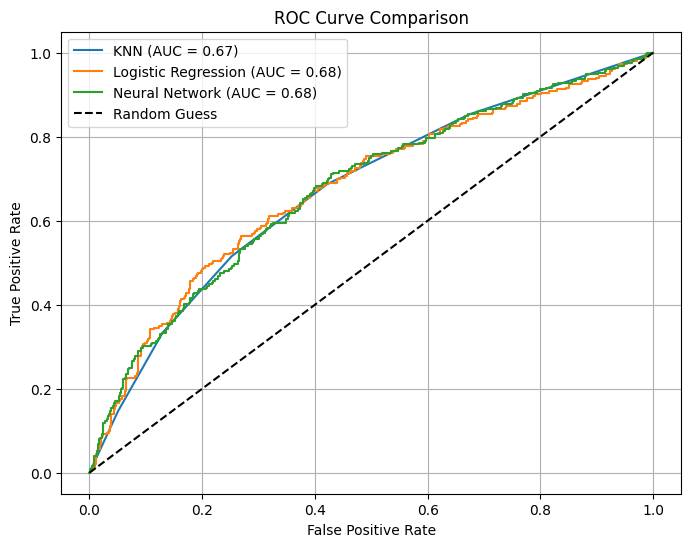

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Already trained — reuse or re-train
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

# Baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()
